In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from extract_ingest.ingest import Ingestor

In [2]:
from analyze.basic_data_inspection import DataInspector, DataSummaryInspectionStrategy, DataTypeInspectionStrategy
from analyze.missing_value import SimpleMisssingValueAnalysis
from analyze.univariate_analysis import UnivariateAnalyzer

In [3]:
ingest = Ingestor()
df = ingest.ingest("C:\projects\ml_learn\EToE\data_extracted\car_data.csv")
df

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ratho\AppData\Local\Temp\ipykernel_13220\3719982656.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = ingest.ingest("C:\projects\ml_learn\EToE\data_extracted\car_data.csv")


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [4]:
inspect = DataInspector(DataTypeInspectionStrategy())

inspect.execute_strategy(df)


Data type and not null count
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None


In [5]:
inspect.setStrategy(DataSummaryInspectionStrategy())
inspect.execute_strategy(df)


Data Summary (Numeric Feature)
           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000

Data Summary (Categorical Feature)
        Gender
count     1000
unique       2
top     Female
freq       516



Missing Value count by Column
Series([], dtype: int64)

 Visualizing Missing Value


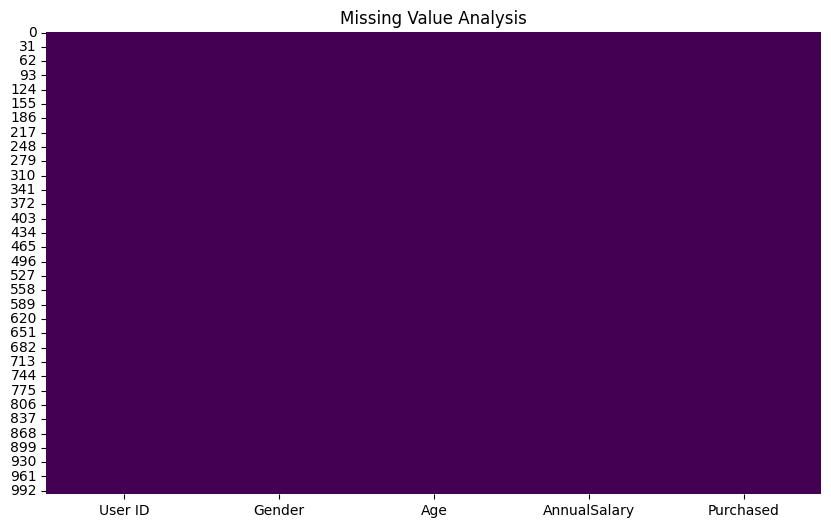

In [6]:
missing_value_analysis = SimpleMisssingValueAnalysis()
missing_value_analysis.analyze(df)

'Age' is a numerical feature.


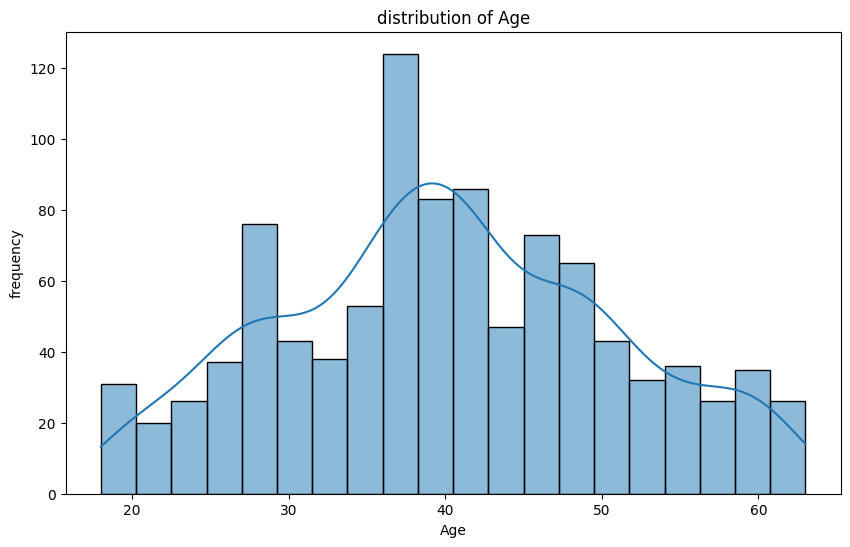

'AnnualSalary' is a numerical feature.


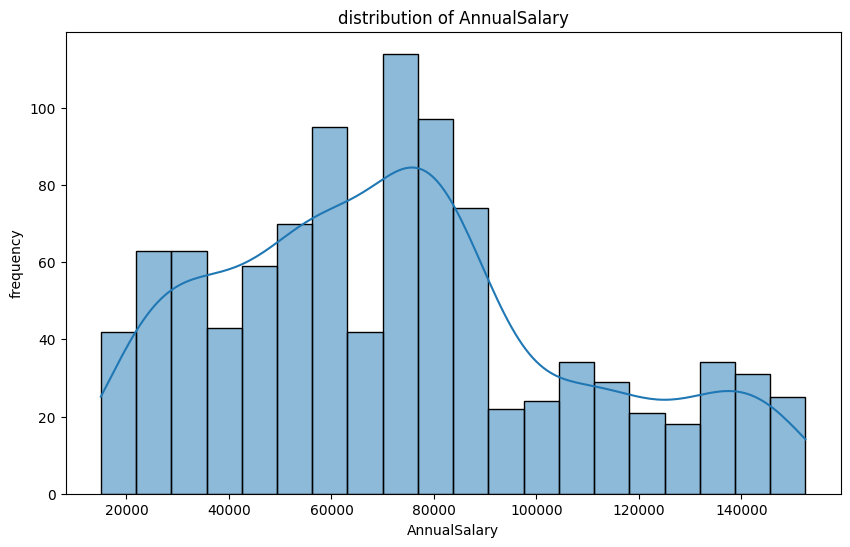

In [10]:
univariate_analyzer = UnivariateAnalyzer()

for feature in ["Age", "AnnualSalary"]:
    univariate_analyzer.execute_strategy(df, feature)